In [1]:
import pandas as pd

In [2]:
# First load the dataset

df = pd.read_csv("/content/glass.csv")

In [4]:
# view the first rows

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
#  View the shape (rows and columns)

df.shape

(214, 10)

In [6]:
# View column names

df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
#  Summary of the statistics

df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
# Check for missing values

df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


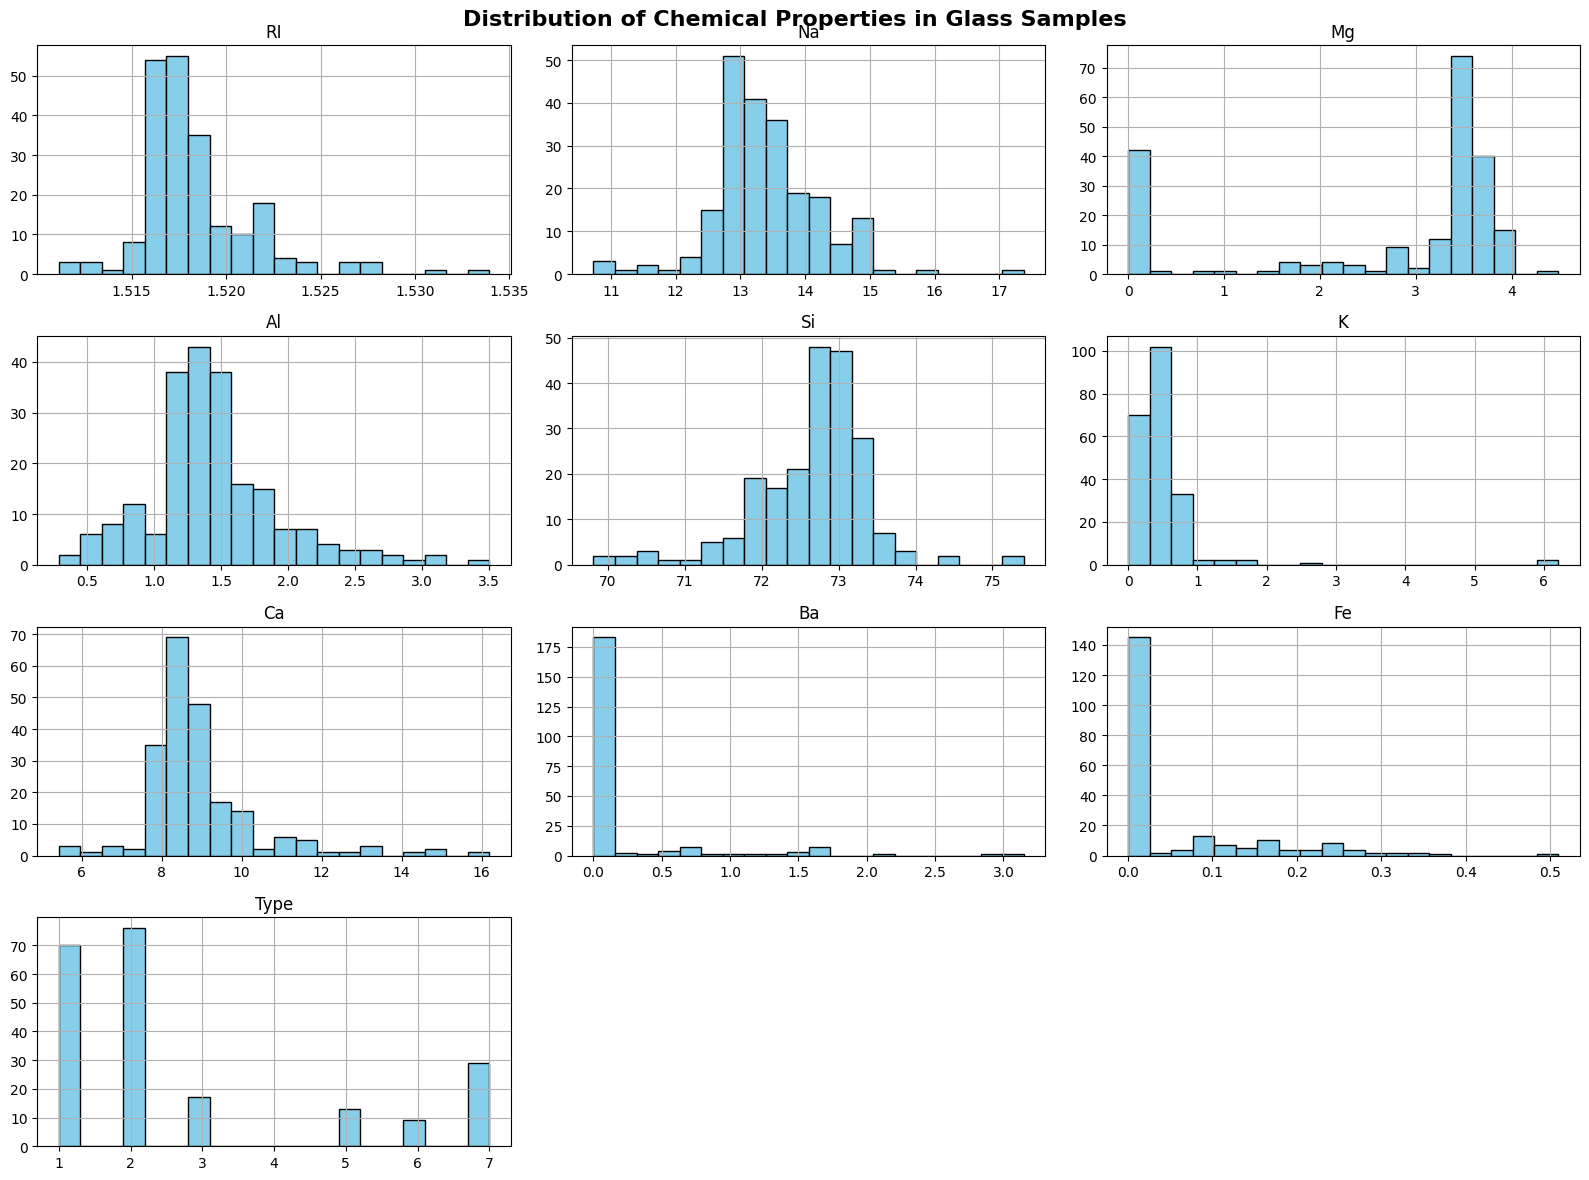

In [16]:
# Visualize feature distribution and class imbalance

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of each feature

df.hist(bins=20, figsize=(16, 12), edgecolor='black', color='skyblue')
plt.suptitle('Distribution of Chemical Properties in Glass Samples', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

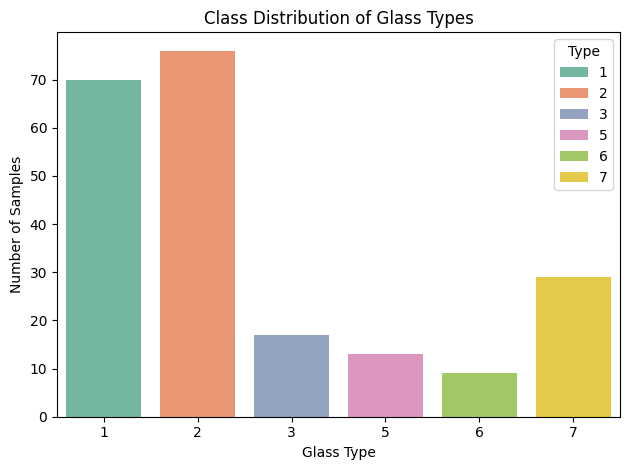

In [22]:
# check class imbalance


sns.countplot(x='Type', hue='Type', data=df, palette='Set2')     # I added the color pallete for better differenciation of glass types
plt.xlabel('Glass Type')
plt.ylabel('Number of Samples')
plt.title('Class Distribution of Glass Types')
plt.tight_layout()
plt.show()

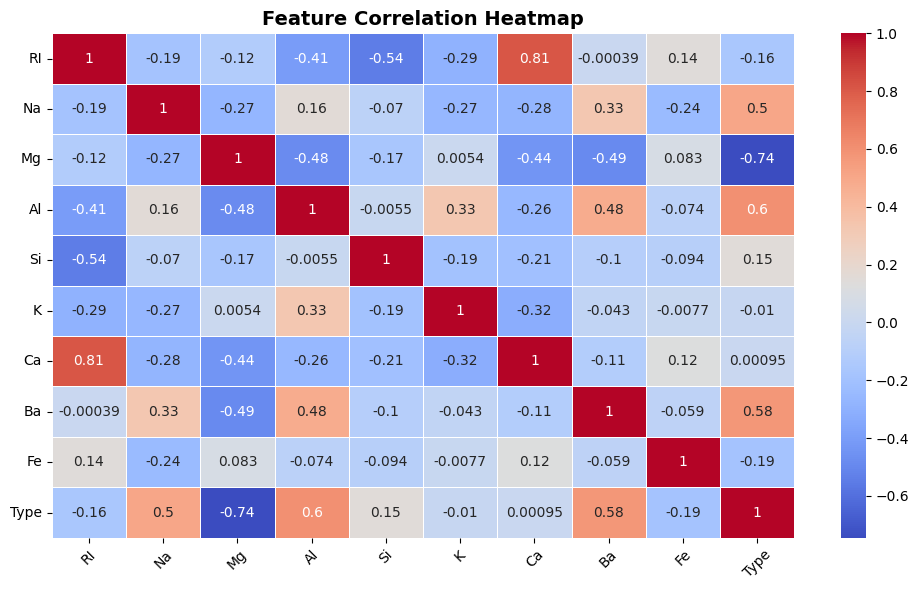

In [23]:
# Performing correlation analysis

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# Part 2: Data Processing
# Normalize or scale the features.

from sklearn.preprocessing import StandardScaler

#  To separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

# To standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Encode the target variable if necessary
# First, check if encoding is needed

y.unique()     # target variable y already contains numbers (like 1, 2, 3), then we don’t need to encode it

array([1, 2, 3, 5, 6, 7])

In [26]:
# Part 3: Model Building
# We will split the data and train 3+ models.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
# Initializing models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [29]:
# Part 4: Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📌 {name} Performance")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


📌 Logistic Regression Performance
[[ 9  2  0  0  0  0]
 [ 3 10  0  0  0  1]
 [ 1  2  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.62      0.71      0.67        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.72        43
   macro avg       0.69      0.62      0.63        43
weighted avg       0.69      0.72      0.69        43


📌 Decision Tree Performance
[[10  0  0  0  0  1]
 [ 5  6  3  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.86      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


📌 Random Forest Performance
[[11  0  0  0  0  0]
 [ 2 10  0  1  0  1]
 [ 1  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.83      0.71      0.77        14
           3       1.00      0.67      0.80         3
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.86      0.81      0.83        43
weighted avg       0.84      0.84      0.83        43



Summarize your findings:

Which model performed best and why?  The Random Forest classifier performed best overall due to its ability to handle nonlinear relationships and feature interactions effectively.

Which features were most influential? Refractive Index (RI), Sodium (Na), and Calcium (Ca) were among the most influential features in distinguishing glass types.

Any challenges encountered? The main challenge was the class imbalance in the target variable, which affected the performance of some models like Logistic Regression.